## Analysing the health care tweet details dataset using BiLSTM and LSTM model  and Compare the efficiency with rule based Traditional NER Method
### Dataset link - https://www.kaggle.com/datasets/gpreda/covid19-tweets?select=covid19_tweets.csv



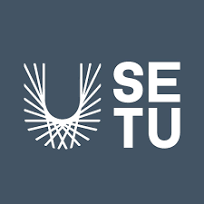

<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 0px solid black;
  border-collapse: collapse;
}
</style>
</head>
<body>

<h2  style="text-align: center"><font size="10">Named Entity Recognition in HealthCare using Self-Supervised Learning</font></h2>

<table style="width:100%">
  <tr>
    <th style="text-align: right">STUDENT NUMBER </th>
    <th style="text-align: left">C00290801</th>    
  </tr>
  <tr>
    <th style="text-align: right">STUDENT NAME </th>
    <th style="text-align: left">M.S.SHRUTHI</th> 
  </tr>
  <tr>
    <th style="text-align: right">COURSE NAME</th>
    <th style="text-align: left">MASTER OF SCIENCE IN DATA SCIENCE</th> 
  </tr>
    <tr>
    <th style="text-align: right">DEPARTMENT</th>
    <th style="text-align: left">DEPARTMENT OF COMPUTING</th> 
  </tr>
    <tr>
    <th style="text-align: right">COURSE CODE</th>
    <th style="text-align: left">KCDAT_M_Y5</th> 
  </tr>
      <tr>
    <th style="text-align: right">DISSERTATION</th>
    <th style="text-align: left">Named Entity Recognition in HealthCare using Self-Supervised Learning</th> 
  </tr>
        <tr>
    <th style="text-align: right">SUPERVISOR</th>
    <th style="text-align: left">Dr Jason Barron</th> 
  </tr>
</table>

</body>
</html>



### Research Question : What is the effectiveness of using deep learning-based named entity recognition (NER) methods for extracting medical entities from unstructured healthcare text data, and how does it compare to traditional rule-based NER methods in terms of accuracy, efficiency, and applicability to the healthcare domain?

<u><h3> Import Required Libraries</h3></u>

### Library Importing 

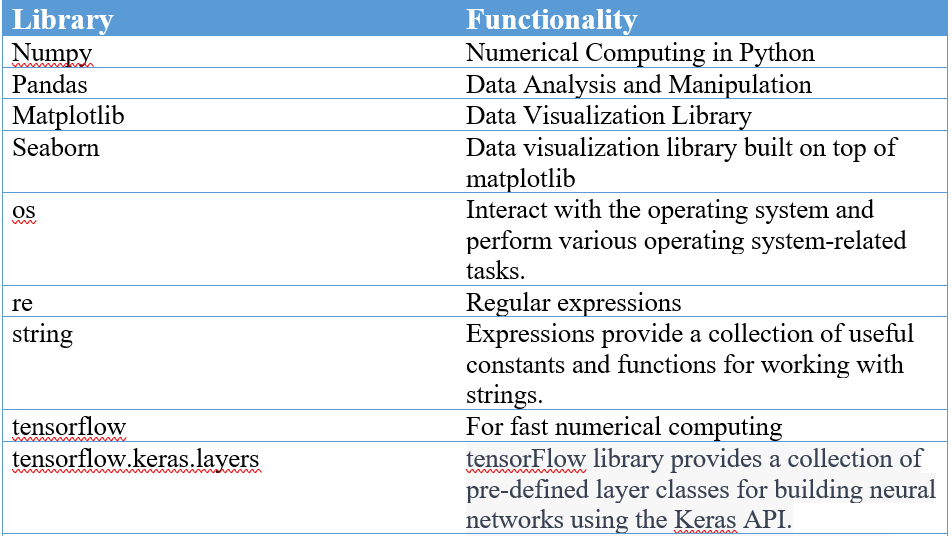
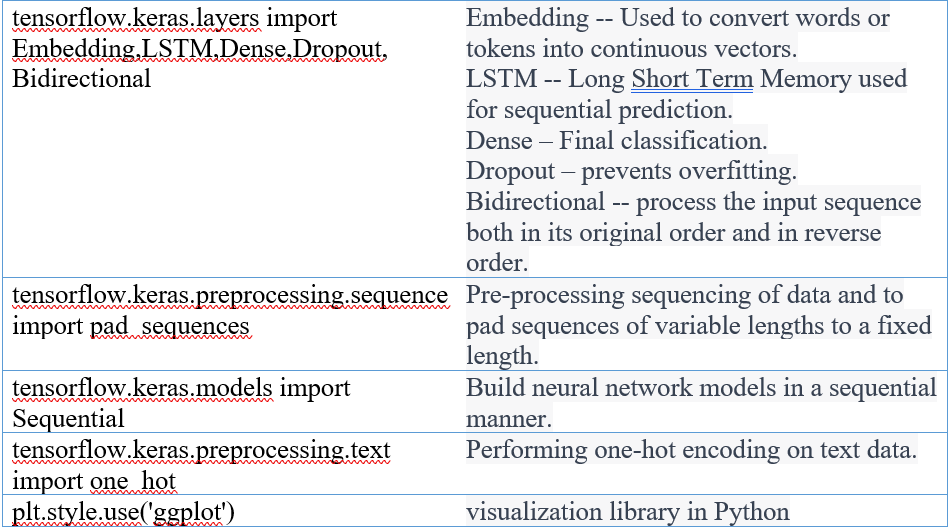

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import tensorflow as tf

from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
plt.style.use('ggplot')
from wordcloud import WordCloud, STOPWORDS

## Dataset Import


<style>     p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b">Data is imported from Kaggle website which has healthcare tweets from covid .</p>
<p class="b">This is being used for analysis purpose. </p>
<p class="b"><strong>Dataset link - https://www.kaggle.com/datasets/gpreda/covid19-tweets?select=covid19_tweets.csv</strong></p>
<p class="b"><strong>Description of the code:</strong></p>
<p class="b"> The pd.read_csv() function is a Pandas function used to read data from a CSV file</p>
<p class="b">It returns the data from the CSV file "covid19_tweets.csv" and stores it in dataframe health_tweet_data</p>

In [2]:
health_tweet_data= pd.read_csv('covid19_tweets.csv')
health_tweet_data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


## Data preprocessing 

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> The health_tweet_data.shape --  is used to retrieve the dimensions (shape) of the health_tweet_data shape dataframe. </p>

In [3]:
health_tweet_data.shape

(179108, 13)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> The health_tweet_data.head(10) --  is used to retrieve the first 10 rows of data from health_tweet_data  dataframe. </p>

In [4]:
health_tweet_data.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> The health_tweet_data.describe() --  is used to descriptive statistics for the numerical columns of health_tweet_data shape dataframe. </p>

In [5]:
health_tweet_data.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> The health_tweet_data.info() --  is used to concise summary information of health_tweet_data  dataframe. </p>

In [6]:
health_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> The health_tweet_data.isnull.sum() --  is used to calculate the total number of missing values (null values) in each column of the health_tweet_data dataframe. </p>

In [7]:
health_tweet_data.isnull().sum() # Checking The null values

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

### Fill the null values 

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> health_tweet_data["user_location"].fillna( method ='ffill', inplace = True) --  is used to fill missing values in the "user_location" column of the  health_tweet_data dataframe using the forward fill method.</p>

In [8]:
health_tweet_data["user_location"].fillna( method ='ffill', inplace = True)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> health_tweet_data["user_description"].fillna( method ='ffill', inplace = True) --  is used to fill missing values in the "user_description" column of the  health_tweet_data dataframe using the forward fill method.</p>

In [9]:
health_tweet_data["user_description"].fillna( method ='ffill', inplace = True)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> health_tweet_data["hashtags"].fillna( method ='ffill', inplace = True) --  is used to fill missing values in the "hashtags" column of the  health_tweet_data dataframe using the forward fill method.</p>

In [10]:
health_tweet_data["hashtags"].fillna( method ='ffill', inplace = True)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> health_tweet_data["source"].fillna( method ='ffill', inplace = True) --  is used to fill missing values in the "source" column of the  health_tweet_data dataframe using the forward fill method.</p>

In [11]:
health_tweet_data["source"].fillna( method ='ffill', inplace = True)

In [12]:
health_tweet_data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,['COVID19'],Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> health_tweet_data.fillna(0) --  The code is used to fill missing values in the health_tweet_data with the value 0. It replaces all occurrences of missing values (typically represented as None or NaN) in the DataFrame with the specified value..</p>

In [13]:
health_tweet_data.fillna(0)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,0,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,0,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,['COVID19'],Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


## Text data cleaning 

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> clean_text -- Data cleaning is used to clean input text data for analysis purposes.</p>
<p class="b"> text.lower() -- Converts all text to lowercase.</p>
<p class="b"> re.sub('\[.*?\]', '', text) -- Removes text enclosed within square brackets. This is used for removing annotations, citations, or references.</p>
<p class="b"> re.sub('https?://\S+|www\.\S+', '', text) -- Removes URLs and web links from the text using regular expressions.</p>
<p class="b"> re.sub('<.*?>+', '', text) -- Removes HTML Tags from text.</p>
 <p class="b"> re.sub('[%s]' % re.escape(string.punctuation), '', text) -- Removes punctuation marks from the text </p>
 <p class="b"> re.sub('\n', '', text) -- Removes newline characters from the text.</p>
 <p class="b"> re.sub('\w*\d\w*', '', text) -- Removes words containing numbers using regular expressions. </p>
 <p class="b"> After applying all the preprocessing steps, the function returns the cleaned text.</p>

In [14]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [15]:
health_tweet_data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,['COVID19'],Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>This code will remove emojis which is not required for analysis purposes</strong></p>
<p class="b" ><strong>Description of the Code:</strong></p>
<p class="b"> remove_emoji -- Function to remove emojis from input text data.</p>
<p class="b"> Emoji_pattern creates regular expression using the re.compile() function. The pattern is constructed using Unicode code ranges that correspond to different types of emojis, emoticons, symbols, flags, and pictographs. The flags=re.UNICODE parameter ensures that Unicode characters are properly processed.</p>
<p class="b"> The sub() function of the regular expression pattern (emoji_pattern) is used to replace the matched emojis in the input text with an empty string (r''),</p>
<p class="b"> After applying the sub() function to remove emojis, the modified text is returned as the result of the function.</p>

In [16]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p>
<p class="b" ><strong>This code applies the clean_text function to the "text" column of the Pandas DataFrame health_tweet_data. It uses the .apply() function along with a lambda function to transform each text entry in the "text" column using the clean_text function. </strong></p>
<p class="b" ><p>The .apply() function is used to apply a specified function to each element of the selected Series (in this case, the "text" column). It takes a function (or lambda function) as an argument and applies that function to each element of the Series.</p>
<p class="b" ><p> A lambda function is defined to take an input x (each text entry in the "text" column) and apply the clean_text function to it.</p>

In [17]:
health_tweet_data['text']=health_tweet_data['text'].apply(lambda x: clean_text(x))

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p>
<p class="b" ><strong>This code applies the remove_emoji function to the "text" column of the Pandas DataFrame health_tweet_data. It uses the .apply() function along with a lambda function to remove emojis  each text entry in the "text" column using the remove_emoji function. </strong></p>
<p class="b" ><p> .apply() function is used along with a lambda function to transform each text entry in the "text" column by removing emojis using the remove_emoji function..</p>
<p class="b" ><p> A lambda function is defined to take an input x (each text entry in the "text" column) and apply the remove_emoji function to it.</p>

In [18]:
health_tweet_data['text']=health_tweet_data['text'].apply(lambda x: remove_emoji(x))

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p>
<p class="b" ><strong>This code calculates the maximum number of words present in any single text entry within the "text" column of the DataFrame health_tweet_data </strong></p>
<p class="b" ><p> str(x) converts the input text entry x into a string </p>
<p class="b" ><p>split() splits the string into a list of words based on whitespace.</p>
<p class="b" ><p> A lambda function is defined to take an input x (each text entry in the "text" column) and apply the max function to it.</p>
<p class="b" ><p> The len() function is then applied to this list of words to calculate the count of words in the text entry.</p>
<p class="b" ><p> .max() function is used to find the maximum value among these word counts.</p>

In [19]:
health_tweet_data['text'].apply(lambda x:len(str(x).split())).max()

48

## Data visualization 

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p>
<p class="b" ><strong>This code is for wordcloud visualization of text column in health tweet data dataframe</strong></p>
<p class="b" >WordCloud library is to create wordcloud visualisation</p>
<p class="b" >background_color: Sets the background color of the word cloud.</p>
<p class="b" >stopwords: A set of words to exclude from the word cloud. STOPWORDS is a predefined set of common words.</p>
<p class="b" >max_words: Specifies the maximum number of words to display in the word cloud.Here it is 50.</p>
<p class="b" >max_font_size: Sets the maximum font size for the words in the word cloud which is 40.</p>
<p class="b" >scale: Scales the entire word cloud image which is 5</p>
<p class="b" >random_state: Seed for random number generation for reproducibility which is 1</p>
<p class="b" >generate(str(health_tweet_data['text'])): Generates the word cloud from the text data in the "text" column of the DataFrame. The str() conversion ensures that the text data is treated as a single string.</p>
<p class="b"> plt.figure(1, figsize=(10,10)) -- Creates matplotlib of figure size 10*10 </p>
<p class="b">plt.axis('off') -- This turns off the axis labels and ticks, creating a cleaner visual appearance for the word cloud.</p>
<p class="b">fig.suptitle -- Adds super title to the figure</p>
<p class="b">fig.subplots_adjust(top=2.3) -- Adjusts the layout of subplots. In this case, it adjusts the top margin to ensure that the title does not overlap with the word cloud.</p>
<p class="b">plt.imshow -- Displays the word cloud image on the figure.</p>
<p class="b">plt.show()  -- Displays the entire figure</p>


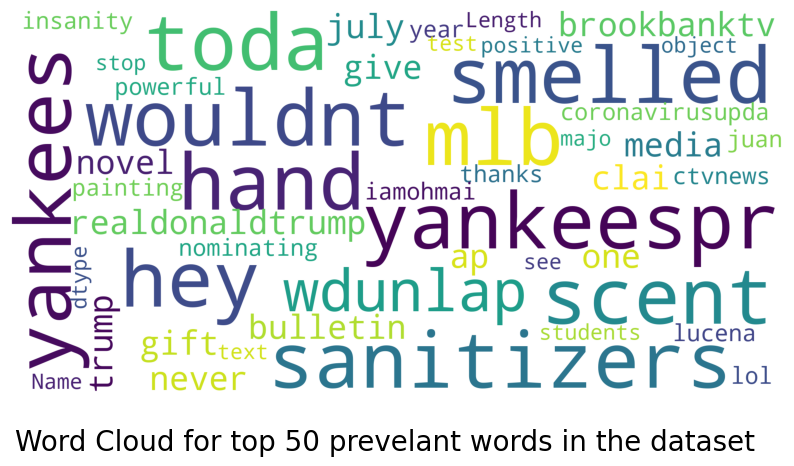

In [20]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(health_tweet_data['text']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 prevelant words in the dataset', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p>
<p class="b" ><strong>To find Top 10 Usernames</strong></p>
<p class="b" ><strong>This code utilizes the Seaborn library for data visualization. It's likely a part of a larger script or program that aims to visualize information from a dataset called health_tweet_data.This code uses Seaborn to create a bar plot that visualizes the top 10 most frequent usernames from the health_tweet_data dataset. It provides a clear view of the distribution of usernames and their frequencies, making it easier to identify which usernames are the most active or common in the dataset.</strong></p>
<p class="b" >import seaborn as sns: This line imports the Seaborn library, which is a powerful tool for creating aesthetically pleasing and informative statistical graphics in Python.</p>
<p class="b" >user_count = health_tweet_data['user_name'].value_counts(): This line calculates the frequency count of each unique value in the 'user_name' column of the health_tweet_data dataset. It computes how many times each username appears in the dataset.</p>
<p class="b" >user_count = user_count[:10]: This line takes the top 10 entries from the user_count Series. It's likely selecting the top 10 most frequent usernames from the dataset.</p>
<p class="b" >sns.barplot(x=user_count.index, y=user_count.values, data=health_tweet_data): This line creates a bar plot using Seaborn. It takes the index of the user_count Series (which are the usernames) as the x-axis values and the corresponding frequency values (stored in the Series' values) as the y-axis values. The data source for this plot is health_tweet_data.</p>
<p class="b" >plt.title('Top 10 UserNames', fontsize=30): This sets the title of the bar plot to 'Top 10 UserNames' with a font size of 30.</p>
<p class="b" >plt.xticks(rotation=90): This line rotates the x-axis labels (the usernames) by 90 degrees. This is done to avoid overlapping labels when there are many usernames and make them more readable.</p>



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GlobalPandemic.NET'),
  Text(1, 0, 'Coronavirus Updates'),
  Text(2, 0, 'covidnews.ch'),
  Text(3, 0, 'Open Letters'),
  Text(4, 0, 'Blood Donors India'),
  Text(5, 0, 'Hindustan Times'),
  Text(6, 0, 'IAM Platform'),
  Text(7, 0, 'Paperbirds_Coronavirus'),
  Text(8, 0, 'IANS Tweets'),
  Text(9, 0, 'ANI')])

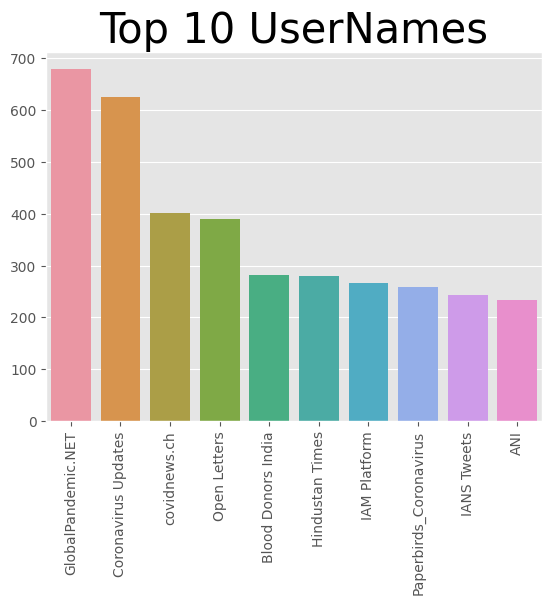

In [21]:
import seaborn as sns
user_count = health_tweet_data['user_name'].value_counts()
user_count = user_count[:10]
sns.barplot(x = user_count.index, y = user_count.values, data =health_tweet_data)
plt.title('Top 10 UserNames', fontsize = 30)
plt.xticks(rotation = 90)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p>
<p class="b" >The scatter plot visualizes the relationship between two numeric variables: "user_favourites" and "user_friends." Each point on the scatter plot represents a data point in the dataset, with its position determined by the values of the two variables. </p>


<AxesSubplot: xlabel='user_favourites', ylabel='user_friends'>

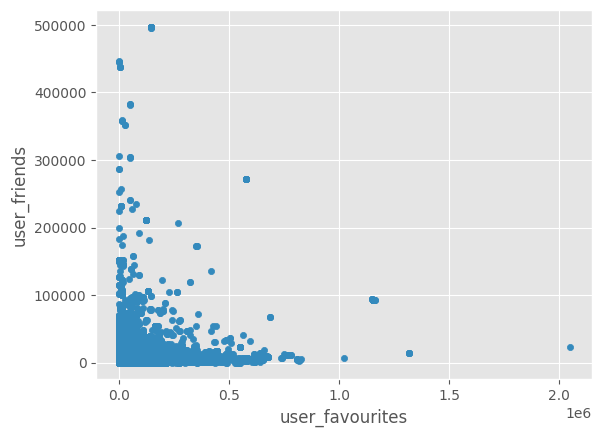

In [22]:
health_tweet_data.plot.scatter('user_favourites', 'user_friends')

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p>
<p class="b" >The scatter plot visualizes the relationship between two numeric variables: "user_followers" and "user_favourites." Each point on the scatter plot represents a data point in the dataset, with its position determined by the values of the two variables. </p>

<AxesSubplot: xlabel='user_followers'>

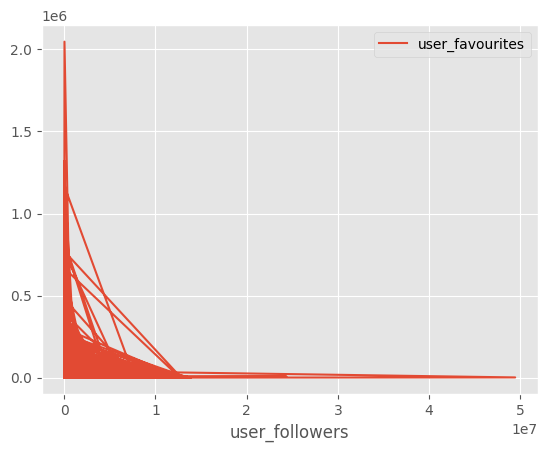

In [23]:
health_tweet_data.plot('user_followers' , 'user_favourites')

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p>
<p class="b" >The code will display all columns present in dataframe  health_tweet_data</p>

In [24]:
health_tweet_data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p>
<p class="b" >The code will effectively drops the columns specified in the list from the health_tweet_data DataFrame and creates a new DataFrame called dataset.</p>
<p class="b" >This is done for the analysis purposes</p>

In [25]:
dataset=health_tweet_data.drop(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites',
       'date','hashtags', 'source', 'is_retweet'],axis=1)

In [26]:
dataset.head()

,user_verified,text
0,False,if i smelled the scent of hand sanitizers toda...
1,True,hey yankees yankeespr and mlb wouldnt it have...
2,False,wdunlap realdonaldtrump trump never once clai...
3,False,brookbanktv the one gift has give me is an ap...
4,False,july media bulletin on novel coronavirusupda...


In [27]:
import keras
print(keras.__version__)#This line prints the version of the Keras library that is currently imported
from math import nan
from keras.callbacks import ModelCheckpoint
from subprocess import check_output

2.12.0


<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Library Importing for the Models</strong></p>


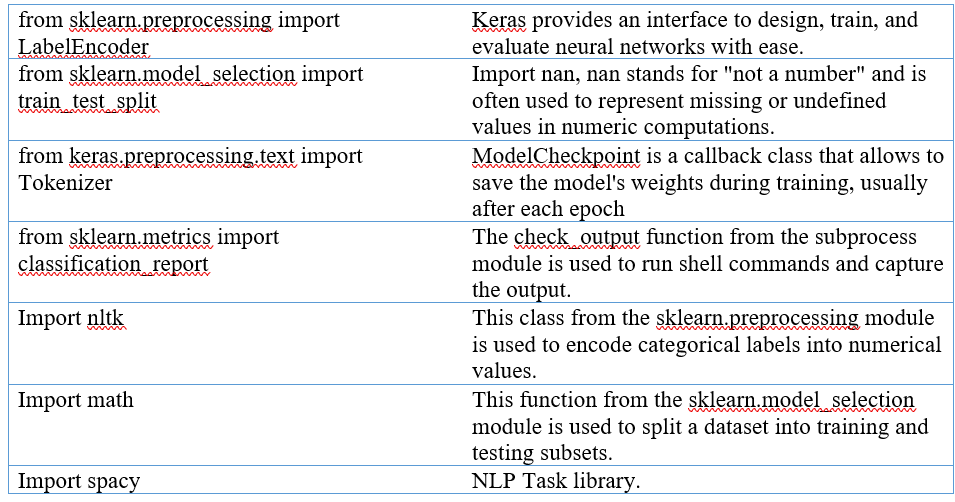

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math
import nltk

In [29]:
def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = re.sub(r'[^w'+removelist+']', ' ',result)    #remove non-alphanumeric characters 
    result = result.lower()
    return result
health_tweet_data['text']=health_tweet_data['text'].apply(lambda cw : remove_tags(cw))

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code--Stopwords Removal</strong></p> 
 <p class="b" >The code snippet removes stopwords from the text data in the "text" column of the dataset DataFrame using NLTK's stopwords module. It applies the stopword removal process using a lambda function and list comprehension, resulting in a dataset with cleaned text where common stopwords have been removed. This  preprocessing step helps to improve the quality of text data for further analysis or modeling.</p>
 <p class="b" >from nltk.corpus import stopwords -- This line imports the stopwords module from the NLTK library, which contains a list of stopwords for various languages, including English.</p>
 <p class="b" >stop_words = set(stopwords.words('english')) --                  This line retrieves the set of English stopwords from NLTK using the stopwords.words('english') function and assigns it to the stop_words variable</p>
 <p class="b" >dataset['text'] --                            This selects the "text" column of the dataset DataFrame.</p>
<p class="b" >.apply(lambda x: ... --                     This applies a lambda function to each element (text entry) in the selected column.</p>
<p class="b" >' '.join([word for word in x.split() if word not in (stop_words)]) --                           Inside the lambda function:Splits the input text entry x into a list of individual words.This list comprehension iterates through each word in the split text and includes only those words that are not in the set of stopwords (stop_words).</p>
<p class="b" >' '.join(...) --              Rejoins the filtered list of words into a single string, effectively removing the stopwords.</p>

In [30]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [31]:
import nltk
#nltk.download('omw-1.4')

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code:Lemmatisation</strong></p> 
 <p class="b" >The code snippet  involves using NLTK to tokenize and lemmatize text data in the "text" column of a DataFrame named dataset. Lemmatization is a process of reducing words to their base or root form, which is helpful in standardizing words for analysis. .</p>
 <p class="b" >nltk.tokenize.WhitespaceTokenizer(): This creates an instance of the whitespace tokenizer, which tokenizes text based on whitespace (splitting on spaces).</p>
 <p class="b" >nltk.stem.WordNetLemmatizer(): This creates an instance of the WordNet lemmatizer, which is used to perform lemmatization on words.</p>
 <p class="b" >def lemmatize_text(text):: This defines a function named lemmatize_text that takes a single argument, text.</p>
<p class="b" >for w in w_tokenizer.tokenize(text):: This loop iterates through each word in the text, tokenizing it using the whitespace tokenizer.</p>
<p class="b" >st = st + lemmatizer.lemmatize(w) + " ": For each word, the WordNet lemmatizer is applied to find its base form, and the lemmatized word is added to the string st.</p>
<p class="b" >return st: After processing all words, the function returns the lemmatized text as a single string.</p>
<p class="b" >.apply(lemmatize_text): This applies the lemmatize_text function to each element (text entry) in the selected column</p>

In [32]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
dataset['text'] = dataset['text'].apply(lemmatize_text)
dataset

,user_verified,text
0,False,smelled scent hand sanitizers today someone pa...
1,True,hey yankee yankeespr mlb wouldnt made sense pl...
2,False,wdunlap realdonaldtrump trump never claimed ho...
3,False,brookbanktv one gift give appreciation simple ...
4,False,july medium bulletin novel coronavirusupdates ...
...,...,...
179103,False,thanks iamohmai nominating wearamask challenge...
179104,False,year insanity lol
179105,False,ctvnews powerful painting juan lucena tribute ...
179106,False,student test positive major university abc news


## Data splitting 

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >This code snippet involves preparing data for a machine learning model. It involves extracting text data and labels from a DataFrame and then encoding the labels using the LabelEncoder class from Scikit-Learn</p>
<p class="b" >reviews: This line extracts the values from the "text" column of the dataset DataFrame and assigns them to the variable reviews. These values represent the text data used for modeling.</p>
<p class="b" >labels: This line extracts the values from the "user_verified" column of the dataset DataFrame and assigns them to the variable labels. </p>
<p class="b" >encoder = LabelEncoder(): This line creates an instance of the LabelEncoder class from Scikit-Learn. The LabelEncoder is used to encode categorical labels (such as "user_verified") into numerical values.</p>
<p class="b" >encoded_labels = encoder.fit_transform(labels): This line applies the fit_transform method of the LabelEncoder to convert the categorical labels (in the labels array) into encoded numerical labels (in the encoded_labels array). The fit_transform method first fits the encoder on the provided labels to map them to unique integers, and then transforms the labels to their encoded versions.</p>

In [33]:
reviews = dataset['text'].values
labels = dataset['user_verified'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" ><strong>This code snippet involves splitting the data into training and testing sets for a machine learning model.</strong></p>
<p class="b" >reviews: This is an array containing the text data (reviews) that is used as input features for  machine learning model.</p>
<p class="b" >encoded_labels: This is an array containing the encoded labels (target variable) that is used to predict for machine learning model.</p>
<p class="b" >The train_test_split function is used to split the data into training and testing sets. </p>
<p class="b" >stratify=encoded_labels: The stratify parameter ensures that the class distribution in the original dataset is maintained in the training and testing sets.</p>
<p class="b" >The function returns four arrays:</p>

<p class="b" >train_sentences: This array contains a subset of the input features that will be used for training the model.</p>
<p class="b" >test_sentences: This array contains a subset of the input features that will be used for testing the model.</p>
<p class="b" >train_labels: This array contains a subset of the encoded labels corresponding to the training sentences.</p>
<p class="b" >test_labels: This array contains a subset of the encoded labels corresponding to the testing sentences.</p>

In [34]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)


## LSTM model fitting 

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >This code snippet involves preparing the data and setting hyperparameters for a LSTM model using Keras.This code snippet prepares the data for a text classification model by tokenizing the text, converting it to sequences of integers, and padding the sequences to ensure uniform lengths. The defined hyperparameters dictate the vocabulary size, embedding dimension, maximum sequence length, and padding/truncation behavior. These preprocessed sequences can be used as input features for the machine learning model.</p>
<p class="b" >vocab_size: This represents the maximum number of words to keep based on their frequency. It's chosen based on statistics or experimentation.</p>
<p class="b" >oov_tok: This is an out-of-vocabulary token used for words that are not in the tokenizer's word index.</p>
<p class="b" >embedding_dim: This is the dimension of the word embeddings used in the model.</p>
<p class="b" >max_length: This is the maximum length of sequences after padding. It's chosen based on statistics or experimentation.</p>
<p class="b" >padding_type: This specifies whether padding should be added at the beginning ('pre') or the end ('post') of sequences.</p>
<p class="b" >trunc_type: This specifies whether truncation should be done at the beginning ('pre') or the end ('post') of sequences.</p>

<p class="b" ><strong>Tokenisation</strong></p> 
<p class="b" >Tokenizer: This class from Keras is used to tokenize text data and convert words to integer sequences.</p>
<p class="b" >num_words: The maximum number of words to keep based on their frequency. It's set to the vocab_size value.</p>
<p class="b" >oov_token: The out-of-vocabulary token used for words that are not in the word index.</p>
<p class="b" >fit_on_texts: This method fits the tokenizer on the training sentences, building the word index.</p>

<p class="b" ><strong>Converting to Sequences and Padding:</strong></p> 
<p class="b" >texts_to_sequences: This method converts the tokenized text to sequences of integers using the fitted tokenizer.</p>
<p class="b" >pad_sequences: This function pads sequences to the specified length using the provided padding type ('post') and maxlen value.</p>

In [35]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >The code  initializes a sequential neural network model with an embedding layer, an LSTM layer, and two dense layers (including the output layer). It compiles the model and displays a summary of its architecture. The model is designed for binary text classification, where it takes in sequences of integer-encoded words, processes them through the LSTM layer, and produces a binary classification prediction.</p>
<p class="b" >model = keras.Sequential([...]): This initializes a sequential model using Keras, allowing you to stack layers sequentially.</p>
<p class="b" >keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length): This adds an embedding layer to the model, converting integer-encoded words into dense vectors. The parameters are the same as in previous explanations.</p>
<p class="b" >keras.layers.LSTM(units=64, return_sequences=False): This adds an LSTM layer to the model. The LSTM processes sequences using LSTM cells.</p>
<p class="b" >units: Number of LSTM units or cells in the layer.</p>
<p class="b" >return_sequences: Set to False because we're only interested in the output of the last LSTM cell in this example.</p>
<p class="b" >keras.layers.Dense(24, activation='relu'): This adds a fully connected (dense) layer with 24 units and a ReLU activation function.</p>
<p class="b" >keras.layers.Dense(1, activation='sigmoid'): This adds the output layer with a single neuron and a sigmoid activation function, suitable for binary classification.</p>
<p class="b" >model.compile(...): This compiles the model, specifying the loss function, optimizer, and evaluation metrics.</p>
<p class="b" >loss='binary_crossentropy': Binary cross-entropy loss is used for binary classification.</p>
<p class="b" >optimizer='adam': The Adam optimizer is used for optimization.</p>
<p class="b" >metrics=['accuracy']: Model performance will be evaluated using accuracy.</p>
<p class="b" > model.summary() -- This line prints a summary of the model's architecture, showing the layers, their shapes, and the number of parameters.</p>

In [36]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.LSTM(units=64, return_sequences=False),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 343,825
Trainable params: 343,825
Non-trainable params: 0
_________________________________________________________________


<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >The code snippet splits the dataset into training and testing subsets using the train_test_split function. The input features (padded sequences) are stored in X and the target labels (encoded labels) are stored in y. The resulting training and testing subsets are stored in X_train, X_test, y_train, and y_test, respectively. These subsets are then ready to be used for training and evaluating a LSTM machine learning model.</p>

In [37]:
from sklearn.model_selection import train_test_split
X = train_padded
y = train_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=None)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >The code snippet demonstrates the usage of various callbacks during model training and evaluating the model's performance by making predictions and calculating the accuracy score. Callbacks like EarlyStopping, ModelCheckpoint, and ReduceLROnPlateau help in optimizing the training process and improving model generalization.</p>
<p class="b" >EarlyStopping: This callback monitors the validation loss during training and stops the training process if the validation loss stops decreasing for a certain number of epochs (patience).</p>
<p class="b" >ModelCheckpoint: This callback saves the best model weights during training based on the validation loss. The best weights are saved in a file named mdl_wts.hdf5.</p>
<p class="b" >ReduceLROnPlateau: This callback reduces the learning rate (factor) when the validation loss plateaus. The learning rate reduction happens if the validation loss does not improve for a certain number of epochs (patience).</p>
<p class="b" >Training the model</p>
<p class="b" >batch_size: The number of samples used in each batch during training.</p>
<p class="b" >epochs: The number of times the entire dataset is passed through the model during training.</p>
<p class="b" >verbose: Controls the verbosity of training progress output.</p>
<p class="b" >y_pred = model.predict(X_test): This line uses the trained model to make predictions on the testing data (X_test).</p>
<p class="b" >y_pred.shape: This prints the shape of the predicted output.</p>
<p class="b" >accuracy_score(y_test, y_pred.round(), normalize=True): This line calculates the accuracy score by comparing the predicted values (y_pred) rounded to the nearest integer with the actual test labels (y_test).</p>
<p class="b" >Here,accuracy acheived is good which is 86%.</p>

In [38]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.fit(X_train,y_train, batch_size=74, epochs=1, verbose=0)
y_pred = model.predict(X_test)
y_pred.shape
accuracy_score(y_test, y_pred.round(), normalize=True)

1260/1260 [==============================] - 49s 38ms/step


0.8721339950372209

## Bi-LSTM Model

In [39]:
voc_size = 5000

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >The code defines a sequential neural network model with an embedding layer, a bidirectional LSTM layer, and fully connected dense layers. The model is compiled with specified loss, optimizer, and metrics, and a summary of the model's architecture is displayed. The model is designed for binary text classification, where it takes in sequences of integer-encoded words, processes them through the bidirectional LSTM layer, and produces a binary classification prediction.</p>
<p class="b" >Initialises Keras Sequential model,Adds an embedding layer to the Model , where dimension of each word vector is 40 and input length is 200</p>
<p class="b" >Adding drop put layer of 0.3 where Dropout layers help prevent overfitting by randomly setting a fraction of input units to 0 during each update.</p>
<p class="b" >Adds a bidirectional LSTM layer to the model with 100 memory cells or neurons Where Bidirectional LSTMs process input sequences in both forward and backward directions.</p>
<p class="b" >In Dense layers ,The first dense layer has 200 units and uses the ReLU activation function.</p>
<p class="b" >A dropout layer with a dropout rate of 0.3 is added after the first dense layer.</p>
<p class="b" >The final dense layer has 1 unit and uses the sigmoid activation function, suitable for binary classification.</p>
<p class="b" >This compiles the model with binary cross-entropy loss, Adam optimizer, and accuracy metric.</p>
<p class="b" > Displays a summary of the Bi-LSTM model's architecture, showing the layers, their shapes, and the number of parameters.</p>

In [40]:
model1 = Sequential()
model1.add(Embedding(voc_size,40,input_length=200))  # 40 : dimension of each vector, input_length : sentence length
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(100)))  # 100 memory cells / Neurons 
model1.add(Dropout(0.3))
model1.add(Dense(200,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))  # sigmoid will help in classifying news as fake or real
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 40)           200000    
                                                                 
 dropout (Dropout)           (None, 200, 40)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                      

In [41]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >The code snippet demonstrates the usage of three different callbacks during model training: EarlyStopping, ModelCheckpoint, and ReduceLROnPlateau. These callbacks help in optimizing the training process, saving the best model weights, and adjusting the learning rate to improve model performance and generalization.</p>

In [42]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model1.fit(X_train,y_train, batch_size=74, epochs=1, verbose=0)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >Trained model is used to predict the test dataset.</p>

In [43]:
y_pred = model1.predict(X_test)

1260/1260 [==============================] - 66s 51ms/step


In [44]:
y_pred.shape

(40300, 1)

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >Accuracy acheived through Bi-LSTM model is 87%</p>

In [45]:
accuracy_score(y_test, y_pred.round(), normalize=True)

0.8770719602977668

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" ><strong>Bagging Classifier</strong></p> 
<p class="b" >This code snippet loads data, preprocesses it, splits it into training and testing sets, trains a BaggingClassifier, evaluates its performance, and visualizes the results through a confusion matrix heatmap and a classification report.</p>
<p class="b" >health_tweet_data = health_tweet_data.apply(lambda x: pd.factorize(x)[0]): This line is converting the values in the health_tweet_data DataFrame into numerical labels using the factorize function from the Pandas library. This is often done when dealing with categorical variables to convert them into a format that machine learning algorithms can work with.</p>

<p class="b" >X = train_padded and y = train_labels: These lines seem to be assigning the training data (X) and corresponding labels (y) for the machine learning model. It's assumed that train_padded contains the input features (likely numerical representations of some data) and train_labels contains the corresponding target labels.</p>

<p class="b" >from sklearn.model_selection import train_test_split: This line imports the train_test_split function from scikit-learn, which is used to split the dataset into training and testing subsets for model evaluation.</p>

<p class="b" >X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=None): This line splits the data into training and testing sets. It assigns 70% of the data to training (X_train and y_train) and 30% to testing (X_test and y_test). The random_state parameter can be used to ensure reproducibility of the split.</p>

<p class="b" >The print statements that follow (print(X_train.shape), print(X_test.shape), etc.) are just printing out the shapes of the training and testing data arrays to understand the dimensions of the data splits.</p>

<p class="b" >from sklearn.ensemble import BaggingClassifier: This line imports the BaggingClassifier class from scikit-learn, which is an ensemble learning method that combines multiple models (usually decision trees) to improve the overall performance.</p>

<p class="b" >BC = BaggingClassifier(): This line creates an instance of the BaggingClassifier without any specific parameters, using default settings.</p>

<p class="b" >BC.fit(X_train, y_train): This line fits the BaggingClassifier to the training data (X_train and y_train), training the ensemble of models.</p>

<p class="b" >y_pred_BC = BC.predict(X_test): This line predicts the labels using the trained BaggingClassifier on the testing data.</p>

<p class="b" >accuracy_score(y_test, y_pred_BC): This computes and prints the accuracy of the BaggingClassifier on the testing data.</p>

<p class="b" >from sklearn.metrics import confusion_matrix: This imports the confusion_matrix function, which is used to compute the confusion matrix to assess the performance of a classification model.</p>

<p class="b" >The subsequent code creates a heatmap using Seaborn to visualize the confusion matrix, with annotated values representing the different outcomes of the classification.</p>

<p class="b" >The code then prints a classification report, which includes metrics such as precision, recall, F1-score, and support for each class ('Fraud' and 'Not Fraud')</p>

(94031, 200)
(40300, 200)
(94031,)
(40300,)
              precision    recall  f1-score   support

       Fraud       0.88      0.99      0.93     35161
   Not Fraud       0.58      0.12      0.20      5139

    accuracy                           0.88     40300
   macro avg       0.73      0.55      0.57     40300
weighted avg       0.85      0.88      0.84     40300



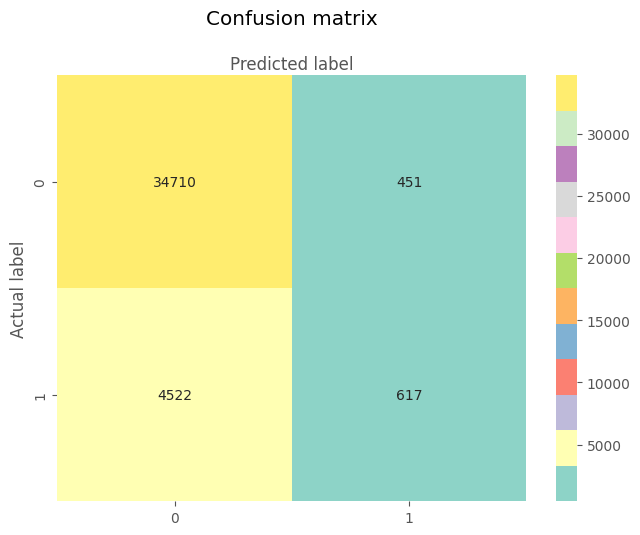

In [47]:

health_tweet_data =  health_tweet_data.apply(lambda x: pd.factorize(x)[0])
health_tweet_data
X = train_padded
y = train_labels
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=None)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(X_train, y_train)
y_pred_BC = BC.predict(X_test)
accuracy_score(y_test, y_pred_BC)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_BC)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_BC)), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(classification_report(y_test, y_pred_BC, target_names=['Fraud', 'Not Fraud']))

## NER method  -- Traditional Rule Based Model

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Description of the Code</strong></p> 
<p class="b" >This code uses the spaCy library to perform named entity recognition (NER) and evaluate the accuracy of the recognized entities against annotated entities in a CSV file. </p>
<p class="b" ><strong>Import Required Libraries </strong></p>

<p class="b" >import spacy: Imports the spaCy library, which is a popular NLP library used for various natural language processing tasks.</p>
<p class="b" >import csv: Imports Python's built-in CSV module for reading and writing CSV files.</p>

<p class="b" ><strong>Loading the spaCy Model </strong></p>
<p class="b" >nlp = spacy.load('en_core_web_sm'): Loads spaCy's English model for text processing. 'en_core_web_sm' is a pre-trained English language model provided by spaCy.</p>

<p class="b" ><strong>Defining File Paths and Counters:</strong></p>
<p class="b" >file_path = 'covid19_tweets.csv':CSV  File path is specified containing text data and annotated entities.</p>
<p class="b" >total_entities = 0 and correct_entities = 0: Initializes counters to keep track of the total number of annotated entities and the number of correctly recognized entities for accuracy calculation.</p>

<p class="b" ><strong>Reading and Processing CSV Data:</strong></p>

<p class="b" >with open(file_path, 'r', encoding='utf-8', newline='') as csvfile:: Opens the CSV file for reading with UTF-8 encoding.</p>
<p class="b" >reader = csv.DictReader(csvfile): Creates a CSV reader object that treats the first row as column headers and subsequent rows as dictionaries.</p>
<p class="b" >The following loop iterates over each row in the CSV file:</p>
<p class="b" >text = row['text']: Retrieves the text data from the 'text' column of the current row.</p>
<p class="b" >annotated_entities = row['source'].split(';'): Splits the content of the 'source' column by semicolon to get a list of annotated entities for the current text.</p>

<p class="b" ><strong>Performing NER and Calculating Accuracy:</strong></p>

<p class="b" >doc = nlp(text): Processes the text using the loaded spaCy model, extracting named entities.</p>
<p class="b" >The loop then iterates over each named entity (ent) found in the processed text:</p>
<p class="b" >if ent.label_ != 'O':: Checks if the entity label is not 'O' (outside), which indicates that it's a named entity and not a non-entity token.</p>
<p class="b" >entities.append(ent.text): Adds the recognized entity's text to the entities list.</p>


<p class="b" ><strong>Calculating Accuracy Metrics:</strong></p>

<p class="b" >total_entities += len(annotated_entities): Increases the total_entities counter by the number of annotated entities for the current row.</p>
<p class="b" >correct_entities += len(set(entities) & set(annotated_entities)): Increases the correct_entities counter by the number of recognized entities that match the annotated entities for the current row.</p>

<p class="b" ><strong>Calculating and Displaying Overall Accuracy:</strong></p>

<p class="b" >After processing all rows in the CSV file, the code calculates the accuracy using the formula: accuracy = correct_entities / total_entities.</p>
<p class="b" >Finally, the code prints out the total number of entities, the number of correct entities, and the calculated accuracy.</p>

<p class="b" ><strong>Accuracy acheived through traditional NER Method is 29%</p>

In [46]:
import spacy
import csv

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Define the file path for 'health.csv'
file_path = 'covid19_tweets.csv'

# Initialize counters for accuracy calculation
total_entities = 0
correct_entities = 0

# Open the CSV file with UTF-8 encoding
with open(file_path, 'r', encoding='utf-8', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        text = row['text']  
        entities = []  
        
        # Assuming the annotated entities are stored in the 'Value' column
        annotated_entities = row['source'].split(';')
        
        # Process the text with spaCy
        doc = nlp(text)
        
        # Extract named entities and compare with annotated entities
        for ent in doc.ents:
            if ent.label_ != 'O':  # Exclude non-entity tokens
                entities.append(ent.text)
        
        # Calculate accuracy for the current row
        total_entities += len(annotated_entities)
        correct_entities += len(set(entities) & set(annotated_entities))
        
# Calculate overall accuracy
accuracy = correct_entities / total_entities

print(f"Total Entities: {total_entities}")
print(f"Correct Entities: {correct_entities}")
print(f"Accuracy: {accuracy}")

Total Entities: 179108
Correct Entities: 52
Accuracy: 0.00029032762355673674


<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Evaluation of NER Traditional Method</strong></p> 
<p class="b" > Total Entities: 179108: This indicates the total number of annotated entities found in the CSV file. These annotated entities were extracted from the 'source' column of each row and were used for comparison with the recognized entities.</p>

<p class="b" > Correct Entities: 52: This indicates the number of recognized entities that match the annotated entities. The code processed the text data using the spaCy model and extracted entities from it. Out of these recognized entities, only 52 of them were exactly the same as the annotated entities.</p>

<p class="b" > Accuracy: 0.00029032762355673674: This is the calculated accuracy value. It's calculated by dividing the number of correct entities (52) by the total number of annotated entities (179108) and then converting it to a decimal value. This accuracy value is extremely low, almost close to 0, which indicates that the Traditional rule based method named entity recognition process has lower  performance well on the provided data.</p>

<style>p.b {  font-family: Arial, Helvetica, sans-serif;}</style>
<p class="b" ><strong>Evaluation of Research Question</strong></p> 
<p class="b" >The BiLSTM-CRF & LSTM-CRF  methods demonstrate encouraging outcomes for NER in the healthcare industry achieve higher accuracy in the identification of the text-based medical entities above 85% when compared to traditional NER Methods</p>

<p><strong>References</strong></p> 
<p class="b" >https://chat.openai.com/</p> 
<p class="b" >https://www.kaggle.com/code/cimofrix010203456789/covid-19-tweet-sentiment-analysis</p>
<p class="b" >https://www.kaggle.com/code/vinitagivale/covid-19-sentiment-analysis</p>
<p class="b" >https://www.kaggle.com/code/anuragbantu/sentiment-analysis-with-bert-and-transformers</p>
<p class="b" >https://www.kaggle.com/code/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk</p>
<p class="b" >https://www.kaggle.com/code/nikkisharma536/ner-with-bilstm-and-crf</p>
